Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv. And here is the codebook https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
Did people become happier from 2012 to 2014? Compute results for each country in the sample.
Who reported watching more TV in 2012, men or women?
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Submit a link to your work below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#original = pd.read_csv('C:\\Users\\mkennedy\\Documents\\ESSdata_Thinkful.csv')
original = pd.read_csv('D:\\Data\\ESSdata_Thinkful.csv')

In [3]:
data = original

In [4]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


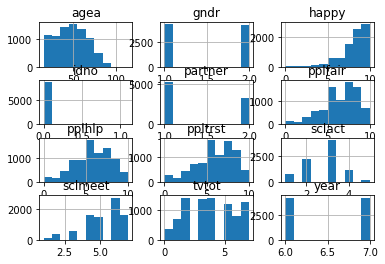

In [5]:
data.hist()
plt.show()

In [6]:
print(len(data))

8594


### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

##### Since the comparison is between two years where all participants experienced both versions, the t-test for paired samples will be used.

In [7]:
data2012 = data.loc[data['year'] ==6]
data2012 = data2012.groupby(data2012['cntry'])['ppltrst'].mean()
print(data2012)
# Test for normal distribution
print(stats.kstest(data2012, 'norm'))
data2014 = data.loc[data['year'] == 7]
data2014 = data2014.groupby(data2014['cntry'])['ppltrst'].mean()
print(data2014)
print(stats.kstest(data2014, 'norm'))

cntry
CH    5.677878
CZ    4.362519
DE    5.214286
ES    5.114592
NO    6.649315
SE    6.058499
Name: ppltrst, dtype: float64
KstestResult(statistic=0.99999357133511468, pvalue=0.0)
cntry
CH    5.751617
CZ    4.424658
DE    5.357143
ES    4.895128
NO    6.598630
SE    6.257709
Name: ppltrst, dtype: float64
KstestResult(statistic=0.99999517023026774, pvalue=0.0)


In [8]:
# pvalue of 0 shows that distribution is not normal

In [9]:
stats.ttest_rel(data2012,data2014)

Ttest_relResult(statistic=-0.56447447786795457, pvalue=0.59681274401551998)

In [10]:
# Negative t-statistic shows a drop in ppltrst

##### The high p-value denotes that the null hypothesis of identical average scores cannot be rejected. By viewing the the printed averages by country from 2012 to 2014, it can be seen that the ppltrst means increased over time with the exception of ES and NO.

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

##### Since the comparison is between two years where all participants experienced both versions, the t-test for paired samples will be used.

In [11]:
# Since the data is not normally distributed and it is a comparison of two samples
    # where all participants experienced both versions, the wilcoxon test will be used
# Test for normal distribution
for unique in data2012.cntry.unique():
    cntry = unique
    data_to_use = data2012[data2012['cntry'] == cntry]
    #print(data_to_use)
    print(stats.kstest(data_to_use['happy'].dropna(),'norm'))
    
    
data.happy.dropna()
data2012 = data.loc[data['year'] ==6]
data2014 = data.loc[data['year'] == 7]
for unique in data2012.cntry.unique():
    cntry = unique
    data_to_use2012 = data2012[data2012['cntry'] == cntry]
    for unique2 in data2014.cntry.unique():
        if unique2 == unique:
            cntry2 = unique2
            data_to_use2014 = data2014[data2014['cntry']==cntry]
            print(cntry, stats.wilcoxon(data_to_use2012['happy'],data_to_use2014['happy']))

AttributeError: 'Series' object has no attribute 'cntry'

##### For the countries where the p-value is greater than .05, there was not a change in happiness.

### Who reported watching more TV in 2012, men or women?

In [15]:
data.tvtot.dropna()
data2012 = data.loc[data['year'] ==6]

for unique in data2012.gndr.unique():
    gndr = unique
    data_to_use = data2012[data2012['gndr'] == gndr]
    print(stats.kstest(data_to_use['tvtot'].dropna(),'norm'))
    
men = data2012[data2012['gndr']==1]
women = data2012[data2012['gndr']==2]
print(stats.mannwhitneyu(men['tvtot'],women['tvtot'],alternative='less'))

KstestResult(statistic=0.85435267179013852, pvalue=0.0)
KstestResult(statistic=0.86148975647580961, pvalue=0.0)
MannwhitneyuResult(statistic=2277506.5, pvalue=0.22419270231191457)


##### The Mann Whitney U test ranks the tvtot values for the male gender (since it was passed first) versus the tvtot values for the female gender. 

##### Since the p-value is so high, the null hypothesis that men and women watched the same amount of tv cannot be rejected.

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone? 

##### Since the comparison is between two independent groups, a ttest for independent samples is used.

In [13]:
partnerfair = data.loc[data['year']==6]
# Test for normal distribution
print(stats.kstest(partnerfair['pplfair'].dropna(), 'norm'))

################### NOT NORMAL USE MANNWHITNEYU

stats.ttest_ind(partnerfair['partner']==1, partnerfair['partner']==2)

KstestResult(statistic=0.94194474764031744, pvalue=0.0)


Ttest_indResult(statistic=23.54768424993765, pvalue=7.2757780196276393e-119)

##### The low p-value suggests that the null hypothesis of identical scores can be rejected.

##### People living with a partner were more likely to believe people were fair (higher statistic value)

### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

##### Multiple independent groups with non-normal distribution call for a median test.

In [16]:
scl = data.loc[data['year'] == 7]

CH = scl[scl['cntry']=='CH'].dropna()
CH = CH.sclact
CZ = scl[scl['cntry']=='CZ'].dropna()
CZ = CZ.sclact
DE = scl[scl['cntry']=='DE'].dropna()
DE = DE.sclact

print('CH KStest: ', stats.kstest([CH], 'norm'))
print('CZ KStest: ', stats.kstest([CZ], 'norm'))
print('DE KStest: ', stats.kstest([DE], 'norm'))

# Trying with Median Test
print('Median Test: ', stats.median_test(CH,CZ,DE))

CH KStest:  KstestResult(statistic=0.99999971334842808, pvalue=5.7330314384707037e-07)
CZ KStest:  KstestResult(statistic=0.99999971334842808, pvalue=5.7330314384707037e-07)
DE KStest:  KstestResult(statistic=0.99996832875816688, pvalue=6.3342483666239957e-05)
Median Test:  (8.4409630417286738, 0.014691568504652792, 3.0, array([[138,  79,   1],
       [605, 527,  13]], dtype=int64))


##### The p-value is below .05, so the null hypothesis can be ruled out.

##### The array lists the number of values above the grand median first and then the number of values below the grand median. 

##### All three countries have different ratios of under versus over values, with DE having the greatest difference, then CZ.

 ### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
 
##### Multiple independent groups calls for a median test.

In [21]:
# Need to sort by country and then age, then do a comparison of each country's age group versus another's sclact

scl = data.loc[data['year']==7]
# Group by country
CH = scl[scl['cntry']=='CH'].dropna()
CZ = scl[scl['cntry']=='CZ'].dropna()
NO = scl[scl['cntry']=='NO'].dropna()

# Group by age
CH_twenty_thirty = CH[CH['agea']<30]
CH_twenty_thirty = CH_twenty_thirty[CH_twenty_thirty['agea']>=20]
CH_twenty_thirty = CH_twenty_thirty.sclact
CZ_twenty_thirty = CZ[CZ['agea']<30]
CZ_twenty_thirty = CZ_twenty_thirty[CZ_twenty_thirty['agea']>=20]
CZ_twenty_thirty = CZ_twenty_thirty.sclact
NO_twenty_thirty = NO[NO['agea']<30]
NO_twenty_thirty = NO_twenty_thirty[NO_twenty_thirty['agea']>=20]
NO_twenty_thirty = NO_twenty_thirty.sclact


print(CH_twenty_thirty.shape, CZ_twenty_thirty.shape, NO_twenty_thirty.shape)

stats.median_test(CH_twenty_thirty, CZ_twenty_thirty, NO_twenty_thirty)

(107,) (95,) (94,)


(0.16104360285522612, 0.92263478860893267, 3.0, array([[16, 15, 16],
        [91, 80, 78]], dtype=int64))

##### The high p-value denotes that the null hypothesis of 